In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score

In [2]:
em = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/1000 Records.csv")
em

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,Ms.,Bonnie,K,Baker,F,bonnie.baker@bp.com,Edwardo Baker,Pauline Baker,Robinson,...,064-02-6162,262-696-9171,Mukwonago,Waukesha,Mukwonago,WI,53149,Midwest,bkbaker,a?Co:/r;nu_wTQ
996,597409,Mr.,Luke,S,Turner,M,luke.turner@charter.net,Javier Turner,Nicole Turner,Sykes,...,056-02-8240,231-629-0498,Freeport,Barry,Freeport,MI,49325,Midwest,lsturner,7n5@64VC7|
997,359608,Hon.,Eva,S,Holman,F,eva.holman@hotmail.com,Coy Holman,Haley Holman,Boyle,...,343-11-1935,209-912-6705,Turlock,Stanislaus,Turlock,CA,95381,West,esholman,DG<<<e}*WgD<U
998,803426,Mrs.,Maritza,H,Christian,F,maritza.christian@microsoft.com,Dion Christian,Stephanie Christian,Mooney,...,336-11-5030,203-224-9056,Stamford,Fairfield,Stamford,CT,6910,Northeast,mhchristian,Krs@#TnM


In [3]:
em.index

RangeIndex(start=0, stop=1000, step=1)

In [4]:
em.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [5]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   object 
 11  Time of Birth           1000 non-null   object 
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   o

In [6]:
em.isnull().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Middle Initial            0
Last Name                 0
Gender                    0
E Mail                    0
Father's Name             0
Mother's Name             0
Mother's Maiden Name      0
Date of Birth             0
Time of Birth             0
Age in Yrs.               0
Weight in Kgs.            0
Date of Joining           0
Quarter of Joining        0
Half of Joining           0
Year of Joining           0
Month of Joining          0
Month Name of Joining     0
Short Month               0
Day of Joining            0
DOW of Joining            0
Short DOW                 0
Age in Company (Years)    0
Salary                    0
Last % Hike               0
SSN                       0
Phone No.                 0
Place Name                0
County                    0
City                      0
State                     0
Zip                       0
Region                    0
User Name           

In [7]:
em.corr()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
Emp ID,1.000000,-0.028516,0.028175,0.039009,0.000999,0.006178,-0.039064,-0.027248,0.020033
Age in Yrs.,-0.028516,1.000000,-0.065656,-0.676875,0.022617,-0.026387,0.676408,0.041422,-0.017266
Weight in Kgs.,0.028175,-0.065656,1.000000,0.058794,0.003933,-0.038591,-0.058846,0.061088,-0.021019
Year of Joining,0.039009,-0.676875,0.058794,1.000000,-0.029644,0.040820,-0.999435,-0.053501,0.027221
Month of Joining,0.000999,0.022617,0.003933,-0.029644,1.000000,0.046362,-0.003848,-0.019298,-0.028749
Day of Joining,0.006178,-0.026387,-0.038591,0.040820,0.046362,1.000000,-0.045185,-0.018947,0.028209
Age in Company (Years),-0.039064,0.676408,-0.058846,-0.999435,-0.003848,-0.045185,1.000000,0.054212,-0.026359
Salary,-0.027248,0.041422,0.061088,-0.053501,-0.019298,-0.018947,0.054212,1.000000,0.007518
Zip,0.020033,-0.017266,-0.021019,0.027221,-0.028749,0.028209,-0.026359,0.007518,1.000000


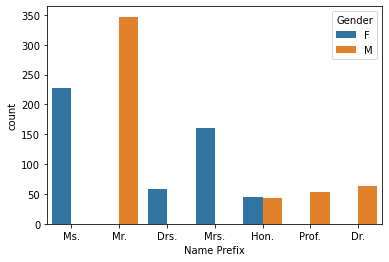

In [8]:
sns.countplot('Name Prefix',hue='Gender',data=em)

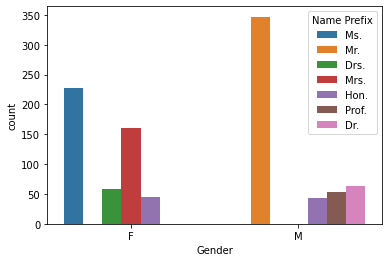

In [9]:
sns.countplot('Gender',hue='Name Prefix',data=em)

In [10]:
em['Emp ID'].is_unique

True

In [11]:
em['Emp ID'].is_unique

True

In [12]:
em['Zip'].is_monotonic_decreasing

False

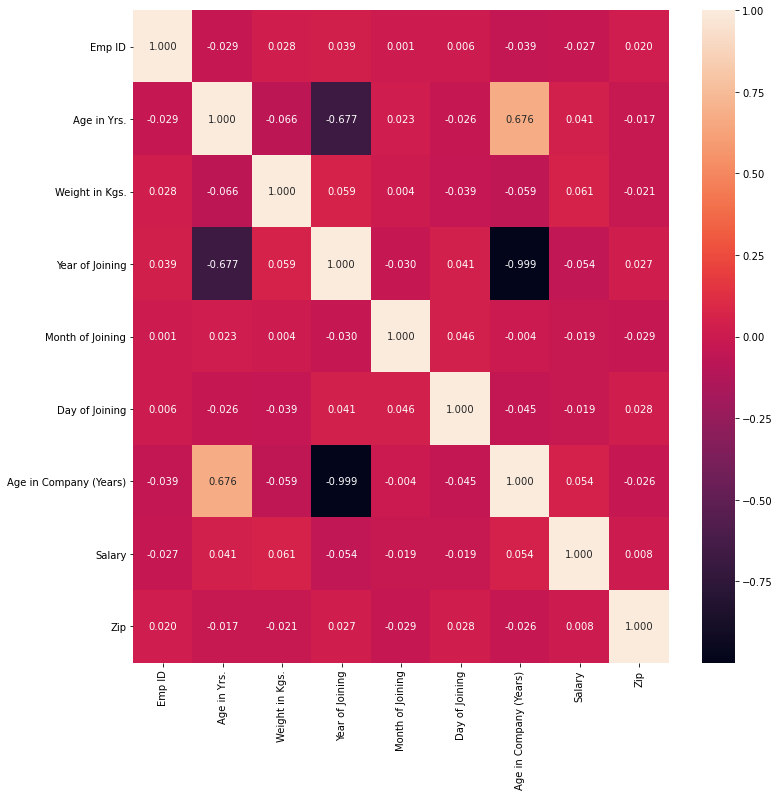

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(em.corr(),annot=True,fmt='.3f')

In [14]:
em['Time of Birth']

0      06:34:47 AM
1      02:02:38 AM
2      03:48:27 PM
3      09:44:16 PM
4      09:30:28 PM
          ...     
995    12:06:26 PM
996    02:49:18 PM
997    12:46:23 PM
998    05:03:13 AM
999    06:16:49 PM
Name: Time of Birth, Length: 1000, dtype: object

In [15]:
import datetime as dt

In [16]:
date_time_lis=['Date of Birth','Time of Birth','Date of Joining']
date_time_lis

['Date of Birth', 'Time of Birth', 'Date of Joining']

In [17]:
for i in date_time_lis:
    em[i]=pd.to_datetime(em[i])
    em[i]=em[i].map(dt.datetime.toordinal)
                         
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   int64  
 11  Time of Birth           1000 non-null   int64  
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   i

In [18]:
em['Date of Joining']

0      734124
1      736444
2      736415
3      731271
4      736248
        ...  
995    733048
996    733836
997    730536
998    734577
999    722831
Name: Date of Joining, Length: 1000, dtype: int64

In [19]:
em.select_dtypes(include=['float64'])

,Age in Yrs.,Age in Company (Years)
0,45.66,6.61
1,23.76,0.26
2,22.68,0.34
3,41.70,14.43
4,22.39,0.79
...,...,...
995,32.01,9.56
996,30.48,7.40
997,59.88,16.44
998,30.21,5.37


In [20]:
# seperating Object datas and working on it
objem=em.select_dtypes(include=['object'])

In [21]:
objem.loc[0,:].keys()

Index(['Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'E Mail', 'Father's Name', 'Mother's Name', 'Mother's Maiden Name',
       'Quarter of Joining', 'Half of Joining', 'Month Name of Joining',
       'Short Month', 'DOW of Joining', 'Short DOW', 'Last % Hike', 'SSN',
       'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Region',
       'User Name', 'Password'],
      dtype='object')

In [22]:
objem

,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Quarter of Joining,...,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Region,User Name,Password
0,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,Q4,...,17%,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,West,swbuck,ja8?k3BTF^]o@<&
1,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,Q2,...,14%,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,Q1,...,28%,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,South,ewfoster,5D.B4IGNkWJfG<~
3,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,Q1,...,16%,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,Midwest,bclancaster,I%?JDM;pW
4,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,Q4,...,11%,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,West,elpotter,j4jkEXfC&Rh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ms.,Bonnie,K,Baker,F,bonnie.baker@bp.com,Edwardo Baker,Pauline Baker,Robinson,Q1,...,10%,064-02-6162,262-696-9171,Mukwonago,Waukesha,Mukwonago,WI,Midwest,bkbaker,a?Co:/r;nu_wTQ
996,Mr.,Luke,S,Turner,M,luke.turner@charter.net,Javier Turner,Nicole Turner,Sykes,Q1,...,16%,056-02-8240,231-629-0498,Freeport,Barry,Freeport,MI,Midwest,lsturner,7n5@64VC7|
997,Hon.,Eva,S,Holman,F,eva.holman@hotmail.com,Coy Holman,Haley Holman,Boyle,Q1,...,14%,343-11-1935,209-912-6705,Turlock,Stanislaus,Turlock,CA,West,esholman,DG<<<e}*WgD<U
998,Mrs.,Maritza,H,Christian,F,maritza.christian@microsoft.com,Dion Christian,Stephanie Christian,Mooney,Q1,...,9%,336-11-5030,203-224-9056,Stamford,Fairfield,Stamford,CT,Northeast,mhchristian,Krs@#TnM


In [23]:
lis=[]
for i in list(objem.loc[0,:].keys()):
    if em[i].is_unique:
        lis.append(i)
print(lis)

['E Mail', "Father's Name", "Mother's Name", 'SSN', 'Phone No. ', 'Password']


In [24]:
drop_lis=lis.copy()
drop_lis

['E Mail', "Father's Name", "Mother's Name", 'SSN', 'Phone No. ', 'Password']

In [25]:
classified_lis=[]
other_lis=[]
for i in list(objem.loc[0,:].keys()):
    if i not in drop_lis:
        if len(em[i].value_counts())<51:
            classified_lis.append(i)
        else:
            other_lis.append(i)

print(classified_lis)
print(other_lis)
print(len(classified_lis)+len(other_lis)+len(drop_lis))
print(len(list(objem.loc[0,:].keys())))

['Name Prefix', 'Middle Initial', 'Gender', 'Quarter of Joining', 'Half of Joining', 'Month Name of Joining', 'Short Month', 'DOW of Joining', 'Short DOW', 'Last % Hike', 'State', 'Region']
['First Name', 'Last Name', "Mother's Maiden Name", 'Place Name', 'County', 'City', 'User Name']
25
25


In [26]:
drop_lis

['E Mail', "Father's Name", "Mother's Name", 'SSN', 'Phone No. ', 'Password']

In [27]:
len(em['State'].value_counts())

50

In [28]:
for i in classified_lis:
    print("Column name is ",i)
    print(em[i].value_counts())
    print("==============================")

Column name is  Name Prefix
Mr.      347
Ms.      227
Mrs.     161
Hon.      89
Dr.       64
Drs.      58
Prof.     54
Name: Name Prefix, dtype: int64
Column name is  Middle Initial
J    48
L    45
H    44
R    44
Z    42
A    42
C    41
D    40
S    40
V    40
Y    40
M    40
G    40
Q    39
I    38
N    38
E    38
P    38
T    36
X    36
K    35
W    33
F    33
O    32
B    31
U    27
Name: Middle Initial, dtype: int64
Column name is  Gender
M    509
F    491
Name: Gender, dtype: int64
Column name is  Quarter of Joining
Q2    276
Q4    251
Q1    243
Q3    230
Name: Quarter of Joining, dtype: int64
Column name is  Half of Joining
H1    519
H2    481
Name: Half of Joining, dtype: int64
Column name is  Month Name of Joining
April        107
October       92
May           88
August        87
February      83
June          81
January       81
November      80
March         79
December      79
July          77
September     66
Name: Month Name of Joining, dtype: int64
Column name is  Short

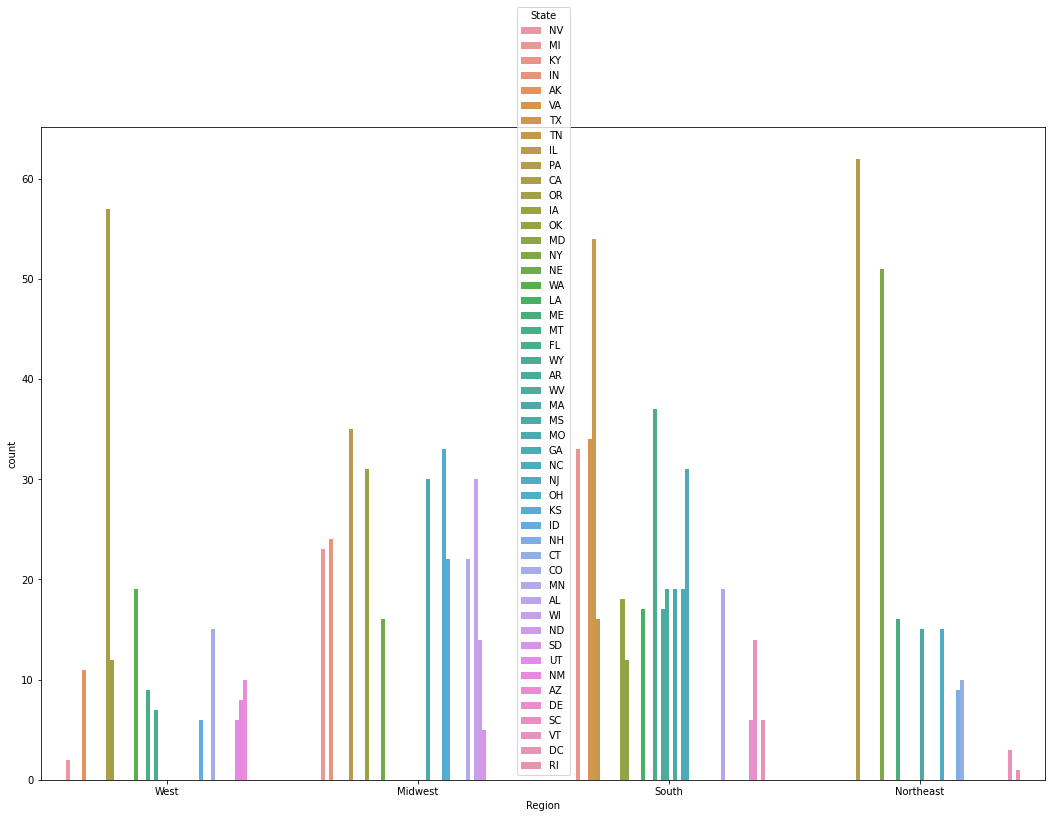

In [29]:
plt.figure(figsize=(18,12))
sns.countplot('Region',hue='State',data=em)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
for i in classified_lis:
    em[i]=le.fit_transform(em[i])
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   int64  
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   int64  
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   int64  
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   int64  
 11  Time of Birth           1000 non-null   int64  
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   i

In [32]:
drop_lis

['E Mail', "Father's Name", "Mother's Name", 'SSN', 'Phone No. ', 'Password']

In [33]:
other_lis

['First Name',
 'Last Name',
 "Mother's Maiden Name",
 'Place Name',
 'County',
 'City',
 'User Name']

In [34]:
for i in drop_lis:
    em.drop(i,axis=1,inplace=True)
for i in other_lis:
    em.drop(i,axis=1,inplace=True)
em

,Emp ID,Name Prefix,Middle Initial,Gender,Date of Birth,Time of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,...,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,State,Zip,Region
0,850297,5,22,0,719873,737814,45.66,44,734124,3,...,2,18,2,2,6.61,119090,9,32,89128,3
1,304721,3,25,1,727867,737814,23.76,52,736444,1,...,0,25,5,5,0.26,117991,6,21,49644,0
2,412317,1,22,0,728258,737814,22.68,42,736415,0,...,7,27,1,1,0.34,161045,21,16,40501,2
3,621375,4,2,0,721316,737814,41.70,43,731271,0,...,3,25,5,5,14.43,142616,8,14,46321,0
4,787549,2,11,0,728365,737814,22.39,58,736248,3,...,10,11,5,5,0.79,135706,3,0,99709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,5,10,0,724856,737814,32.01,59,733048,0,...,4,7,1,1,9.56,72930,2,47,53149,0
996,597409,3,18,1,725414,737814,30.48,84,733836,0,...,7,5,0,0,7.40,121949,8,21,49325,0
997,359608,2,18,0,714683,737814,59.88,50,730536,0,...,3,20,5,5,16.44,82734,6,4,95381,3
998,803426,4,7,0,725510,737814,30.21,48,734577,0,...,7,15,4,4,5.37,66854,30,6,6910,1


In [35]:
target=em['Salary']

In [36]:
em.drop('Salary',axis=1,inplace=True)

In [37]:
em['Salary']=target

In [38]:
em.drop('Time of Birth',axis=1,inplace=True)

In [39]:
em.corr()

,Emp ID,Name Prefix,Middle Initial,Gender,Date of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,...,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Last % Hike,State,Zip,Region,Salary
Emp ID,1.000000,-0.018976,0.021894,0.064168,0.028522,-0.028516,0.028175,0.039085,0.004129,0.011824,...,0.009405,0.006178,0.002980,0.002980,-0.039064,-0.011497,-0.040805,0.020033,-0.011582,-0.027248
Name Prefix,-0.018976,1.000000,-0.034534,-0.352139,-0.023249,0.023223,-0.253939,-0.040800,-0.007585,-0.003663,...,0.013255,-0.011095,-0.002460,-0.002460,0.040800,0.015749,-0.003233,-0.024140,-0.030759,-0.022343
Middle Initial,0.021894,-0.034534,1.000000,0.018486,0.024233,-0.024239,-0.005071,-0.009681,0.031162,0.005075,...,0.028874,0.029837,-0.043292,-0.043292,0.009675,-0.001558,-0.040719,0.011248,-0.001673,0.026068
Gender,0.064168,-0.352139,0.018486,1.000000,0.013803,-0.013794,0.713811,0.047723,0.016359,-0.011326,...,-0.027336,-0.002001,0.062954,0.062954,-0.047735,-0.021617,0.053496,-0.042090,-0.018187,0.050883
Date of Birth,0.028522,-0.023249,0.024233,0.013803,1.000000,-1.000000,0.065679,0.676402,-0.020410,-0.023404,...,-0.009429,0.026388,-0.018030,-0.018030,-0.676404,-0.043030,-0.013821,0.017271,0.018761,-0.041427
Age in Yrs.,-0.028516,0.023223,-0.024239,-0.013794,-1.000000,1.000000,-0.065656,-0.676406,0.020401,0.023395,...,0.009433,-0.026387,0.018045,0.018045,0.676408,0.043050,0.013822,-0.017266,-0.018768,0.041422
Weight in Kgs.,0.028175,-0.253939,-0.005071,0.713811,0.065679,-0.065656,1.000000,0.058831,0.002652,-0.009037,...,-0.020669,-0.038591,0.067686,0.067686,-0.058846,0.002090,0.027235,-0.021019,-0.013824,0.061088
Date of Joining,0.039085,-0.040800,-0.009681,0.047723,0.676402,-0.676406,0.058831,1.000000,-0.000159,-0.006194,...,-0.020309,0.045200,-0.015396,-0.015396,-1.000000,-0.011710,-0.012959,0.026366,0.007927,-0.054220
Quarter of Joining,0.004129,-0.007585,0.031162,0.016359,-0.020410,0.020401,0.002652,-0.000159,1.000000,0.893673,...,0.275013,0.034191,-0.059249,-0.059249,0.000146,-0.015245,0.075757,-0.027502,0.005490,-0.015299
Half of Joining,0.011824,-0.003663,0.005075,-0.011326,-0.023404,0.023395,-0.009037,-0.006194,0.893673,1.000000,...,0.252258,0.025313,-0.072711,-0.072711,0.006181,-0.038510,0.056834,-0.022812,0.003361,0.005996


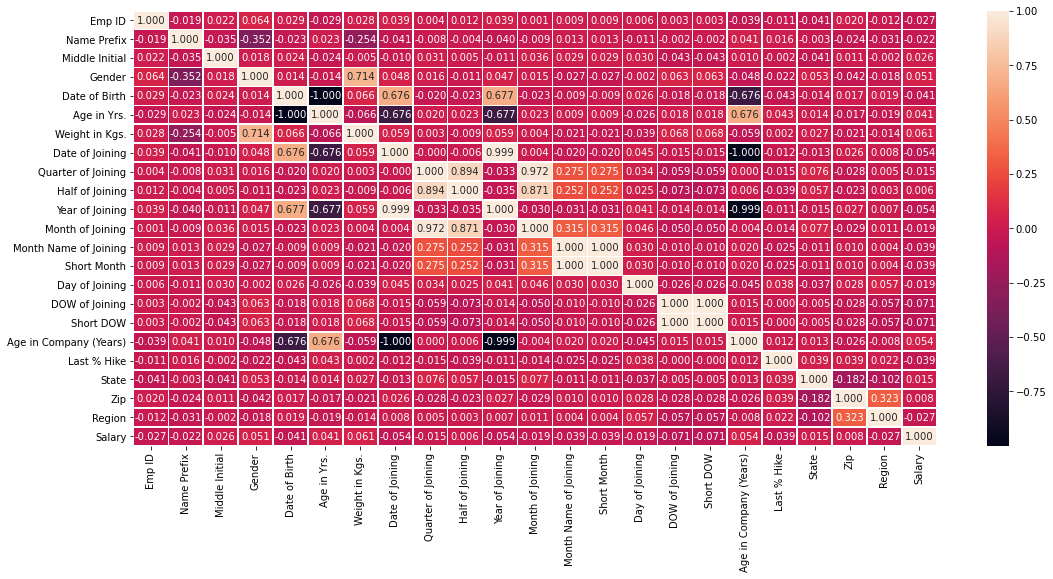

In [40]:
plt.figure(figsize=(18,8))
sns.heatmap(em.corr(),annot=True,fmt='.3f',linewidths=0.5)

In [41]:
# Based on heat map droppig columns are [Quarter of joining, Half of Joining, Month of Joining, Day of Joining,
# state,zip]

In [42]:
em.columns

Index(['Emp ID', 'Name Prefix', 'Middle Initial', 'Gender', 'Date of Birth',
       'Age in Yrs.', 'Weight in Kgs.', 'Date of Joining',
       'Quarter of Joining', 'Half of Joining', 'Year of Joining',
       'Month of Joining', 'Month Name of Joining', 'Short Month',
       'Day of Joining', 'DOW of Joining', 'Short DOW',
       'Age in Company (Years)', 'Last % Hike', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [43]:
drop_lis=['Quarter of Joining','Half of Joining','Month of Joining','Day of Joining','State','Zip']

In [44]:
for i in drop_lis:
    em.drop(i,axis=1,inplace=True)

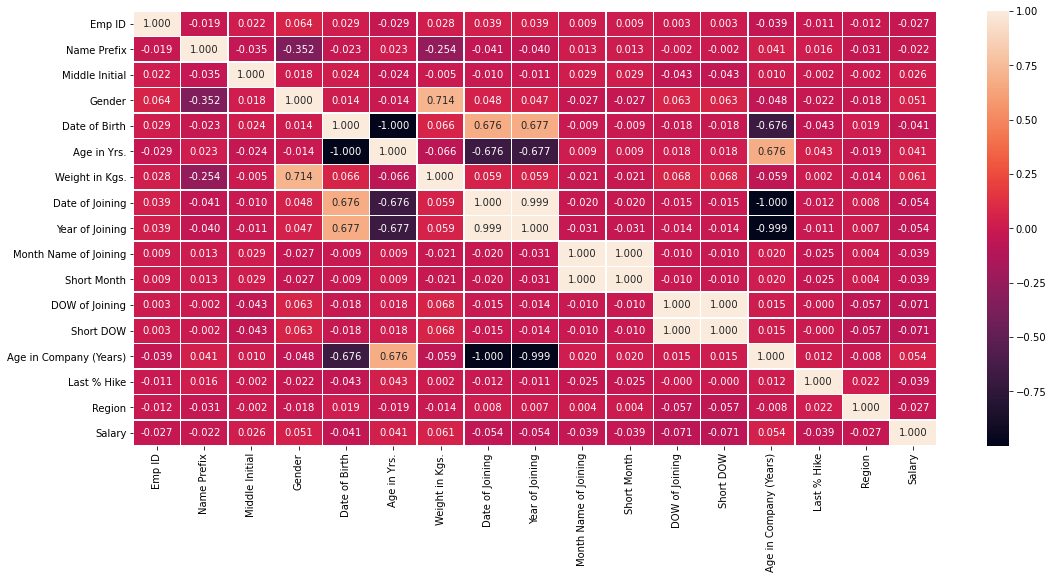

In [45]:
plt.figure(figsize=(18,8))
sns.heatmap(em.corr(),annot=True,fmt='.3f',linewidths=0.5)

In [46]:
# [Emp Id and Redion] [Month Name of Joining and Short Month] [DOW of Joining and Short DOW] they are affecting same effect on salary. So droping one 
#column

In [47]:
em['Month Name of Joining']

0       2
1       0
2       7
3       3
4      10
       ..
995     4
996     7
997     3
998     7
999     4
Name: Month Name of Joining, Length: 1000, dtype: int64

In [48]:
em['Short Month']

0       2
1       0
2       7
3       3
4      10
       ..
995     4
996     7
997     3
998     7
999     4
Name: Short Month, Length: 1000, dtype: int64

In [49]:
em['Last % Hike']

0       9
1       6
2      21
3       8
4       3
       ..
995     2
996     8
997     6
998    30
999    27
Name: Last % Hike, Length: 1000, dtype: int64

In [50]:
em['DOW of Joining']

0      2
1      5
2      1
3      5
4      5
      ..
995    1
996    0
997    5
998    4
999    4
Name: DOW of Joining, Length: 1000, dtype: int64

In [51]:
em['Short DOW']

0      2
1      5
2      1
3      5
4      5
      ..
995    1
996    0
997    5
998    4
999    4
Name: Short DOW, Length: 1000, dtype: int64

In [52]:
# [Emp Id and Redion] [Month Name of Joining and Short Month] [DOW of Joining and Short DOW] 
#they are affecting same effect on salary. So droping one from each list

In [53]:
em.columns

Index(['Emp ID', 'Name Prefix', 'Middle Initial', 'Gender', 'Date of Birth',
       'Age in Yrs.', 'Weight in Kgs.', 'Date of Joining', 'Year of Joining',
       'Month Name of Joining', 'Short Month', 'DOW of Joining', 'Short DOW',
       'Age in Company (Years)', 'Last % Hike', 'Region', 'Salary'],
      dtype='object')

In [54]:
drop_lis=['Region','Short Month','Short DOW']
for i in drop_lis:
    em.drop(i,axis=1,inplace=True)

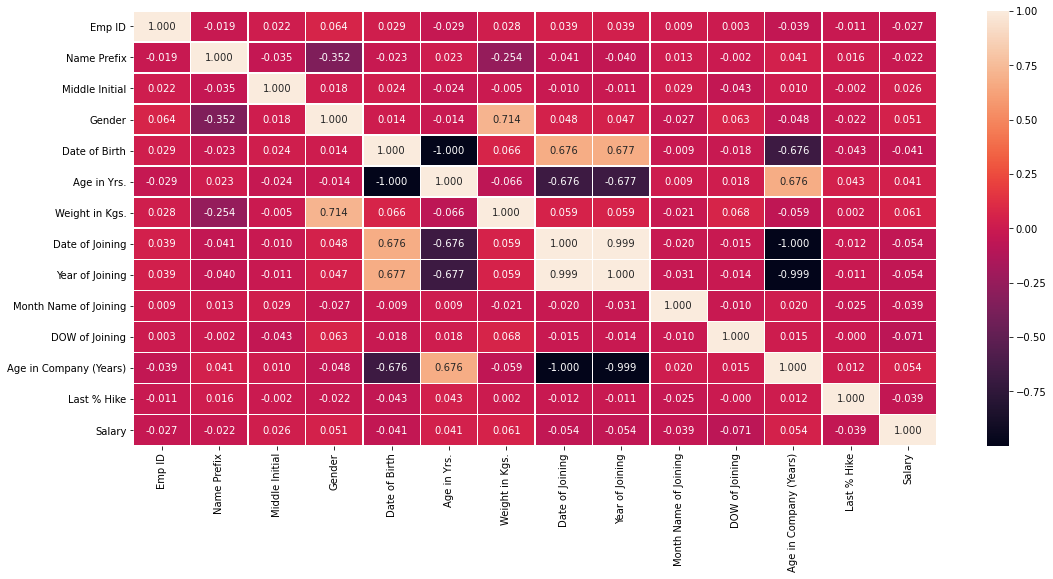

In [55]:
plt.figure(figsize=(18,8))
sns.heatmap(em.corr(),annot=True,fmt='.3f',linewidths=0.5)

In [56]:
em.drop('Date of Joining',axis=1,inplace=True)

In [57]:
# Data visualization

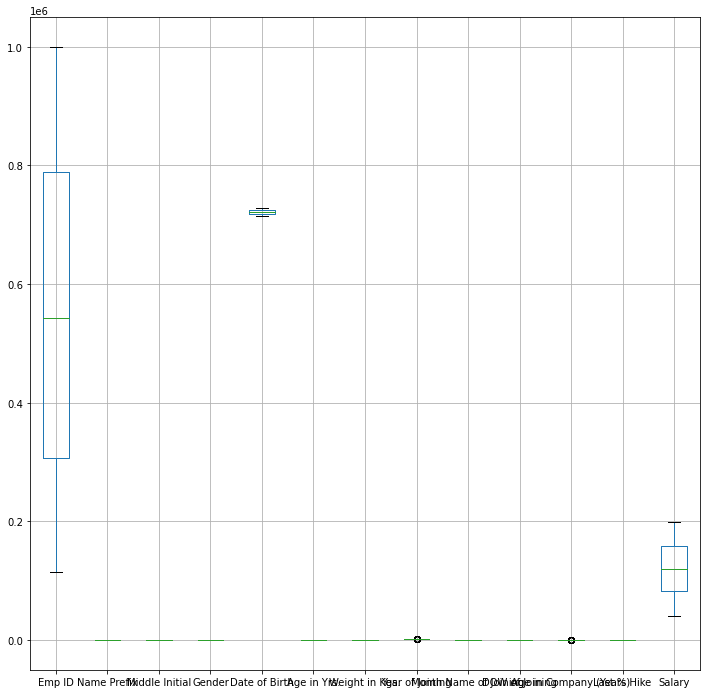

In [58]:
em.boxplot(figsize=(12,12))

In [59]:
em.skew()

Emp ID                    0.029501
Name Prefix              -0.437561
Middle Initial            0.041456
Gender                   -0.036060
Date of Birth            -0.006140
Age in Yrs.               0.006173
Weight in Kgs.            0.657110
Year of Joining          -0.958797
Month Name of Joining     0.015397
DOW of Joining            0.069591
Age in Company (Years)    0.968211
Last % Hike               0.007634
Salary                    0.034356
dtype: float64

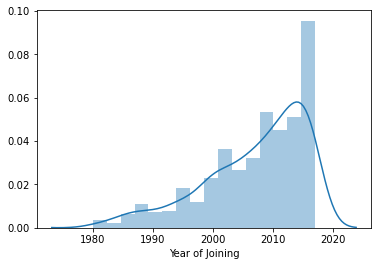

In [60]:
sns.distplot(em['Year of Joining'])

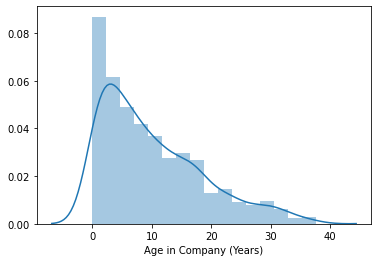

In [61]:
sns.distplot(em['Age in Company (Years)'])

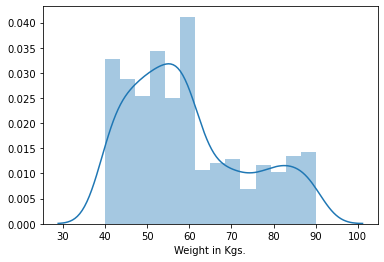

In [62]:
sns.distplot(em['Weight in Kgs.'])

In [63]:
em.head()

,Emp ID,Name Prefix,Middle Initial,Gender,Date of Birth,Age in Yrs.,Weight in Kgs.,Year of Joining,Month Name of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Salary
0,850297,5,22,0,719873,45.66,44,2010,2,2,6.61,9,119090
1,304721,3,25,1,727867,23.76,52,2017,0,5,0.26,6,117991
2,412317,1,22,0,728258,22.68,42,2017,7,1,0.34,21,161045
3,621375,4,2,0,721316,41.70,43,2003,3,5,14.43,8,142616
4,787549,2,11,0,728365,22.39,58,2016,10,5,0.79,3,135706


In [64]:
em.columns

Index(['Emp ID', 'Name Prefix', 'Middle Initial', 'Gender', 'Date of Birth',
       'Age in Yrs.', 'Weight in Kgs.', 'Year of Joining',
       'Month Name of Joining', 'DOW of Joining', 'Age in Company (Years)',
       'Last % Hike', 'Salary'],
      dtype='object')

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [67]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_scores
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(em.drop('Salary',axis=1),em['Salary'], test_size=0.25, 
                                                    random_state=100)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
lr.score(X_train,y_train)
accuracy_score(pred,y_test)

In [ ]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(em.drop('Salary',axis=1),em['Salary'], test_size=0.25, 
                                                    random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} and Cross Validate score is {(crv*100)} # difference is {(accu*100)-(crv*100)}")

In [ ]:
# Removing skewness

In [ ]:
from scipy.stats import boxcox
from scipy.special import boxcox1p


In [ ]:
# em[['Year of Joining','Age in Company (Years)','Weight in Kgs.']]=boxcox(em[['Year of Joining','Age in Company (Years)','Weight in Kgs.']],0.5)

In [ ]:
em['Year of Joining']=boxcox1p(em['Year of Joining'],0.5)

In [ ]:
em['Year of Joining'].skew()

In [ ]:
em['Age in Company (Years)']=boxcox1p(em['Age in Company (Years)'],0.5)

In [ ]:
em['Age in Company (Years)'].skew()

In [ ]:
em['Weight in Kgs.']=boxcox1p(em['Weight in Kgs.'],0)

In [ ]:
em['Weight in Kgs.'].skew()

In [ ]:
em["Salary"]

In [ ]:
# After Removing Skewness Model Generation

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_scores
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(em.drop('Salary',axis=1),em['Salary'], test_size=0.25, 
                                                    random_state=100)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
pred = lr.predict(X_test)
# pred.reshape(-1,1)
rscrore=r2_score(y_test,pred)
# crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
# print(f"Final accuracy is {accuracy_score(y_test,pred)*100} and Cross Validate score is {(crv*100)} # difference is {(accu*100)-(crv*100)}")
print("RMSE is",np.sqrt(mean_squared_error(y_test,pred)))
# print(accuracy_score(y_test,pred.reshape(-1,1)))


In [ ]:
# Standard Scalar

In [ ]:
x=em[['Emp ID', 'Name Prefix', 'Middle Initial', 'Gender', 'Date of Birth',
       'Time of Birth', 'Age in Yrs.', 'Weight in Kgs.', 'Date of Joining',
       'Year of Joining', 'Month Name of Joining', 'DOW of Joining',
       'Age in Company (Years)', 'Last % Hike']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
sst=ss.fit_transform(em[['Emp ID', 'Name Prefix', 'Middle Initial', 'Gender', 'Date of Birth',
       'Time of Birth', 'Age in Yrs.', 'Weight in Kgs.', 'Date of Joining',
       'Year of Joining', 'Month Name of Joining', 'DOW of Joining',
       'Age in Company (Years)', 'Last % Hike']])

In [ ]:
sstdf=pd.DataFrame(sst)
sstdf

In [ ]:
sstdf['Salary']=em["Salary"]

In [ ]:
sns.heatmap(sstdf.corr())

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_scores
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(sstdf.drop('Salary',axis=1), sstdf['Salary'],test_size=0.25, 
                                                    random_state=150)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

In [ ]:
#PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
n_pca=pca.fit_transform(sstdf.drop('Salary',axis=1))
plt.figure(figsize=(18,14))
pcdf=pd.DataFrame(n_pca)
pcdf['Salary']=sstdf['Salary']
sns.heatmap(pcdf.corr(),linecolor="black",linewidths=0.5,annot=True,fmt='.2f',annot_kws={"size":20})

In [ ]:
sns.pairplot(pcdf)

In [ ]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(pcdf.drop('Salary',axis=1), pcdf['Salary'],test_size=0.25, 
                                                    random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} and best random state is {best_state}, Cross Validate score is {(crv*100)}.mean()")

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_scores
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(pcdf.drop('Salary',axis=1), pcdf['Salary'],test_size=0.25, 
                                                    random_state=224)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
print(f"Final accuracy is {accu*100} and Cross Validate score is {(crv*100)}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pcdf.drop('Salary',axis=1), pcdf['Salary'],test_size=0.25, 
                                                    random_state=224)
lr = RandomForestRegressor()
crv=cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
print(f"Final accuracy is {accu*100} and Cross Validate score is {(crv*100)}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pcdf.drop('Salary',axis=1), pcdf['Salary'],test_size=0.25, 
                                                    random_state=224)
lr = DecisionTreeRegressor()
crv=cross_val_score(DecisionTreeRegressor(),X_train,y_train,cv=5).mean()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
print(f"Final accuracy is {accu*100} and Cross Validate score is {(crv*100)} # difference is {(accu*100)-(crv*100)}")

In [ ]:
Conclusion: Salary column has low correlation with all the columns. So 